In [1]:
from model.models import DomainModel, LearnerModel, PedagogyModel
from controller import Controller

c:\Users\Administrator\miniconda3\envs\its-enem\Lib\site-packages\pydantic\_internal\_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
# Mock questions data (could be loaded from a file)
questions = [
    {
        "id": "q1",
        "correct": "A",
        "difficulty": "easy",
        "topics": {
            "Biologia": [
                ["Citologia", "Estrutura Celular", "Membrana Plasmática"],
                ["Citologia", "Estrutura Celular", "Organelas"]
            ]
        }
    },
    {
        "id": "q2",
        "correct": "B",
        "difficulty": "medium",
        "topics": {
            "Biologia": [
                ["Citologia", "Divisão Celular", "Mitose"]
            ],
            "Química": [
                ["Estrutura Atômica", "Modelos Atômicos"]
            ]
        }
    },
    {
        "id": "q3",
        "correct": "C",
        "difficulty": "hard",
        "topics": {
            "Física": [
                ["Mecânica", "Cinemática"],
                ["Mecânica", "Dinâmica"]
            ],
            "Química": [
                ["Termodinâmica", "Primeira Lei"]
            ]
        }
    },
    {
        "id": "q4",
        "correct": "D",
        "difficulty": "easy",
        "topics": {
            "Biologia": [
                ["Ecologia", "Cadeias e Teias Alimentares"]
            ]
        }
    },
    {
        "id": "q5",
        "correct": "E",
        "difficulty": "medium",
        "topics": {
            "Química": [
                ["Química Orgânica", "Hidrocarbonetos"],
                ["Ligação Química", "Ligações Iônicas"]
            ]
        }
    }
]

Domain Model Hierarchy:
Ciências da Natureza
  Biologia
    Citologia
      Estrutura Celular
        - Membrana Plasmática
        - Citoplasma
        - Organelas (Mitocôndrias, Cloroplastos, etc.)
      Função Celular
        - Metabolismo Energético
        - Síntese Proteica
        - Transporte de Substâncias
      Divisão Celular
        - Mitose
        - Meiose
        - Ciclo Celular
    Genética
      Leis de Mendel
        - Primeira Lei (Segregação)
        - Segunda Lei (Assortimento Independente)
        - Exceções às Leis
      DNA e RNA
        - Estrutura Molecular
        - Replicação
        - Transcrição e Tradução
      Biotecnologia
        - Engenharia Genética
        - Clonagem
        - Organismos Geneticamente Modificados
    Ecologia
      Ecossistemas
        - Cadeias e Teias Alimentares
        - Níveis Tróficos
        - Fluxo de Energia
      Ciclos Biogeoquímicos
        - Ciclo do Carbono
        - Ciclo do Nitrogênio
        - Ciclo da Água
      Im

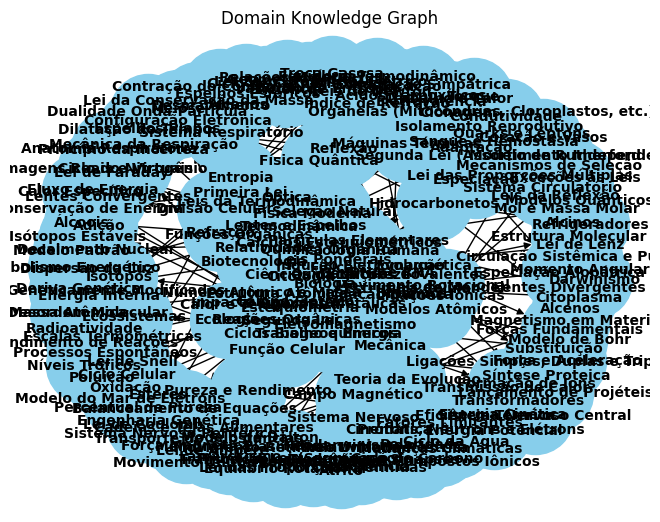

In [3]:
# Initialize models and controller
domain_model = DomainModel('model/domain.yml')
print("Domain Model Hierarchy:")
domain_model.print_domain()
domain_model.plot()

In [4]:
pedagogy_model = PedagogyModel('model/pedagogy.yml')
pedagogy_model.print_rules()

Pedagogical Rules:
  Rule: Relatedness for low topic performance
    Condition: performance.topics[topic].percent_correct < 50.0
    Action: {'feedback_relatedness[topic]': 1}

  Rule: Competence for high topic performance
    Condition: performance.topics[topic].percent_correct > 80.0
    Action: {'feedback_competence[topic]': 1}

  Rule: Autonomy for moderate topic performance
    Condition: performance.topics[topic].percent_correct >= 50.0 AND performance.topics[topic].percent_correct <= 80.0
    Action: {'feedback_autonomy[topic]': 1}

  Rule: Relatedness for low area performance
    Condition: performance.areas[area].percent_correct < 50.0
    Action: {'feedback_relatedness[area]': 1}

  Rule: Competence for high area performance
    Condition: performance.areas[area].percent_correct > 80.0
    Action: {'feedback_competence[area]': 1}

  Rule: Autonomy for moderate area performance
    Condition: performance.areas[area].percent_correct >= 50.0 AND performance.areas[area].percent_c

In [5]:
controller = Controller(domain_model, pedagogy_model, questions)

# Example usage with a single learner
learner = LearnerModel(id="learner_001", answers={"q1": "A", "q2": "B", "q3": "C", "q4": "D", "q5": "E"})
learner = controller.process_learner(learner)
print("\nLearner Performance:")
learner.print_performance()


Learner Performance:
Performance for learner_001:
  Topics:
    Membrana Plasmática: {'total_questions': 1, 'points': 1, 'percent_correct_easy_questions': 100.0, 'percent_correct_medium_questions': 0.0, 'percent_correct_hard_questions': 0.0}
    Organelas: {'total_questions': 1, 'points': 1, 'percent_correct_easy_questions': 100.0, 'percent_correct_medium_questions': 0.0, 'percent_correct_hard_questions': 0.0}
    Mitose: {'total_questions': 1, 'points': 2, 'percent_correct_easy_questions': 0.0, 'percent_correct_medium_questions': 100.0, 'percent_correct_hard_questions': 0.0}
    Modelos Atômicos: {'total_questions': 1, 'points': 2, 'percent_correct_easy_questions': 0.0, 'percent_correct_medium_questions': 100.0, 'percent_correct_hard_questions': 0.0}
    Cinemática: {'total_questions': 1, 'points': 3, 'percent_correct_easy_questions': 0.0, 'percent_correct_medium_questions': 0.0, 'percent_correct_hard_questions': 100.0}
    Dinâmica: {'total_questions': 1, 'points': 3, 'percent_corre

In [6]:
# Generate and process a random learner
learner = controller.generate_learners(1)[0]
learner = controller.process_learner(learner)

# Apply pedagogical rules to check feedback flags
feedback_flags = controller.apply_pedagogy(learner)
report = controller.generate_report(feedback_flags, learner.id)
print(report)

Recommendation Report for learner_1

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.



In [7]:
# Generate mock reports for multiple learners
print("\nGenerating Mock Reports:")
controller.generate_mock_reports(5)


Generating Mock Reports:
    Report for learner_1:
Recommendation Report for learner_1

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_2:
Recommendation Report for learner_2

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_3:
Recommendation Report for learner_3

**Your Strengths:**
- No specific strengths identified yet. Keep working!

**Opportunities for Growth:**
- No specific opportunities for growth at this time.

**Areas to Focus On:**
- All areas are performing satisfactorily.


    Report for learner_4:
Recommendation Report for learner_4

**Your Strengths:**
- No specific strengt